In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA

In the above section, we import the necessary libraries: pandas for data manipulation, numpy for numerical operations, matplotlib for plotting, and ARIMA from statsmodels.tsa.arima.model for the ARIMA model.

In [ ]:
# This line reads the dataset from the CSV file called 'Co2_Data.csv' and stores it in a DataFrame called df.
df = pd.read_csv('Co2_Data.csv')
df

,CO2,Year&Month,Year,Month
0,333.13,1974.38,1974,5
1,332.09,1974.46,1974,6
2,331.10,1974.54,1974,7
3,329.14,1974.63,1974,8
4,327.36,1974.71,1974,9
...,...,...,...,...
156,351.71,1987.38,1987,5
157,350.94,1987.46,1987,6
158,349.10,1987.54,1987,7
159,346.77,1987.63,1987,8


In [ ]:
print(df.columns)

Index(['CO2', 'Year&Month', 'Year', 'Month'], dtype='object')


In [ ]:
df.set_index(['Year&Month', 'Year', 'Month'], inplace=True)
df

,,,CO2
Year&Month,Year,Month,
1974.38,1974,5,333.13
1974.46,1974,6,332.09
1974.54,1974,7,331.10
1974.63,1974,8,329.14
1974.71,1974,9,327.36
...,...,...,...
1987.38,1987,5,351.71
1987.46,1987,6,350.94
1987.54,1987,7,349.10


In [ ]:

# Extract the relevant columns
co2_data = df['CO2']
co2_data

Year&Month  Year  Month
1974.38     1974  5        333.13
1974.46     1974  6        332.09
1974.54     1974  7        331.10
1974.63     1974  8        329.14
1974.71     1974  9        327.36
                            ...  
1987.38     1987  5        351.71
1987.46     1987  6        350.94
1987.54     1987  7        349.10
1987.63     1987  8        346.77
1987.71     1987  9        345.73
Name: CO2, Length: 161, dtype: float64

In [ ]:
# Set the training and testing periods
train_size = int(len(co2_data) * 0.8)  # 80% for training, 20% for testing
train_data = co2_data[:train_size]
test_data = co2_data[train_size:]

Sliding window is a technique used in data processing and analysis where a fixed-size window moves over a sequence of data points. The window acts as a frame that captures a subset of the data at a given time, and it "slides" or moves one step at a time, sequentially processing the data. As the window moves, it maintains a certain width or length, typically defined by a specified number of data points. The sliding window allows for the examination of local patterns and relationships within the data. It is commonly used in time series analysis, signal processing, and machine learning tasks such as feature extraction or creating training samples. By sliding the window over the data, it enables the analysis of different segments and facilitates the extraction of relevant information and patterns in a sequential manner.

In [ ]:
# Define the sliding window size
window_size = 2  # Adjust as needed

We define the sliding window size (window_size) as 2 (adjustable), and initialize empty lists to store the predictions and actual values

In [ ]:
# Initialize lists for storing predictions and actual values
predictions = []
actual_values = []


In this loop, we iterate through the test data. For each iteration, we define a training window using train_data and the current window_size. We then create an ARIMA model with an order of (1, 0, 0) and fit it to the training window. We obtain a one-step forecast using model_fit.forecast(), store the predicted value, append it to the predictions list, and append the corresponding actual value to the actual_values list. Finally, we update the training data by appending the next actual value for the sliding window approach.

In [ ]:
# Apply the sliding window approach
for i in range(len(test_data) - window_size + 1):
    train_window = train_data[i:i+window_size]
    model = ARIMA(train_window, order=(1, 0, 0))  # Adjust the order as needed
    model_fit = model.fit()
    forecast = model_fit.forecast(steps=1)
    predicted_value = forecast.iloc[0]  # Access the forecasted value
    
    predictions.append(predicted_value)
    actual_values.append(test_data.iloc[i+window_size-1])

c:\Users\Zaharaddeen K. Lawal\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\Zaharaddeen K. Lawal\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\Zaharaddeen K. Lawal\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\Zaharaddeen K. Lawal\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
c:\Users\Zaharaddeen K. Lawal\anaconda3\lib\site-packages\statsmodels\tsa\

In [ ]:
# Update the training data by appending the next actual value

if i+window_size < len(test_data):
        
        train_data = train_data.append(pd.Series(test_data.iloc[i+window_size], index=[test_data.index[i+window_size]]))



The condition if i+window_size < len(test_data) ensures that there are enough remaining data points in the test data to append to the training data. This check prevents accessing indices that are out of bounds.

If the condition is satisfied, the next actual value from the test data is appended to the training data using the append() function. The iloc[i+window_size] expression retrieves the value at the index i+window_size from the test data.

The pd.Series() function is used to create a new series object from the value obtained from the test data. The index=[test_data.index[i+window_size]] parameter assigns the corresponding index value from the test data to the newly created series object. This ensures that the index values are preserved when appending the series to the training data.

By appending the next actual value to the training data, the model is updated and trained on an expanding dataset as more actual values become available from the test data. This allows the model to learn from the new information and potentially improve its predictions.

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Calculate the mean squared error (MSE)
mse = np.mean((np.array(predictions) - np.array(actual_values))**2)

# Calculate the Mean Absolute Error (MAE)
mae = mean_absolute_error(actual_values, predictions)

# Calculate the Root Mean Squared Error (RMSE)
rmse = np.sqrt(mean_squared_error(actual_values, predictions))

# Calculate the R-squared (R^2) score
r2 = r2_score(actual_values, predictions)

# Print the evaluation metrics
print(f"Mean Squared Error (MSE): {mse}")
print(f"Mean Absolute Error (MAE): {mae}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"R-squared (R^2) Score: {r2}")


Mean Squared Error (MSE): 260.32167400820515
Mean Absolute Error (MAE): 15.819696045802877
Root Mean Squared Error (RMSE): 16.134487100872008
R-squared (R^2) Score: -46.01335990282361
Mean Squared Error (MSE): 260.32167400820515
Mean Absolute Error (MAE): 15.819696045802877
Root Mean Squared Error (RMSE): 16.134487100872008
R-squared (R^2) Score: -46.01335990282361


The above metrics  are commonly used to evaluate the performance of a regression model. 
Here's an explanation of each metric:

    Mean Squared Error (MSE): MSE measures the average squared difference between the predicted values and the actual values. It gives a higher weight to large errors. A lower MSE value indicates better model performance. In this case, the MSE is 260.32167400820515, which means that, on average, the squared difference between the predicted and actual values is 260.32.

    Mean Absolute Error (MAE): MAE measures the average absolute difference between the predicted values and the actual values. It gives equal weight to all errors, regardless of their magnitude. A lower MAE value indicates better model performance. In this case, the MAE is 15.819696045802877, which means that, on average, the absolute difference between the predicted and actual values is 15.82.

    Root Mean Squared Error (RMSE): RMSE is the square root of the MSE and provides a measure of the average magnitude of the errors in the same units as the target variable. Like MSE, a lower RMSE value indicates better model performance. In this case, the RMSE is 16.134487100872008, which means that, on average, the predicted values deviate from the actual values by 16.13.

    R-squared (R^2) Score: R-squared is a statistical measure that represents the proportion of the variance in the dependent variable (target variable) that can be explained by the independent variables (predicted values). It ranges from 0 to 1, where 1 indicates a perfect fit. However, R-squared can also be negative if the model performs worse than a simple horizontal line. In this case, the R-squared score is -46.01335990282361, indicating that the model is not a good fit for the data.

These metrics help you assess the accuracy and performance of your regression model. It's important to interpret them in the context of your specific problem and compare them with other models or benchmarks to evaluate the model's effectiveness.

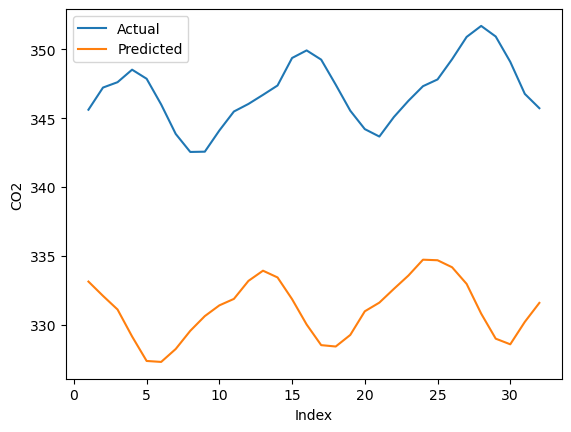

In [ ]:
test_data = test_data.to_frame()  # Convert the Series to a DataFrame
test_data.reset_index(inplace=True)  # Reset index to convert multi-index to single-level index

# Visualize the actual values and predictions
plt.plot(test_data.index[window_size-1:], actual_values, label='Actual')
plt.plot(test_data.index[window_size-1:], predictions, label='Predicted')
plt.xlabel('Index')  # Update the x-label if the index represents a different variable
plt.ylabel('CO2')
plt.legend()
plt.show()
